In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# preparing the data 
data=pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
data

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [4]:
# exploring the data 
data.shape

(940, 15)

In [5]:
data.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [9]:
# changing data type of column ActivityDate in the data 
data["ActivityDate"]=pd.to_datetime(data["ActivityDate"])
data["Id"]=data["Id"].astype(str)

In [10]:
data.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [11]:
data["days_of_week"]=data["ActivityDate"].dt.day_name()
data["month_name"]=data["ActivityDate"].dt.month_name()
data['weekend_or_weekday'] = data['days_of_week'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)


In [12]:
# removing the unwanted columns from the data 
columns_to_drop = [
    'TrackerDistance',
    'LoggedActivitiesDistance',
    'SedentaryActiveDistance',
    'FairlyActiveMinutes',
    'LightActiveDistance',
    'ModeratelyActiveDistance',
    'VeryActiveDistance']

data1 = data.drop(columns=columns_to_drop).copy()

In [13]:
data1.isnull().sum() , data.duplicated().sum()

(Id                      0
 ActivityDate            0
 TotalSteps              0
 TotalDistance           0
 VeryActiveMinutes       0
 LightlyActiveMinutes    0
 SedentaryMinutes        0
 Calories                0
 days_of_week            0
 month_name              0
 weekend_or_weekday      0
 dtype: int64,
 0)

In [14]:
data1.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance',
       'VeryActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes',
       'Calories', 'days_of_week', 'month_name', 'weekend_or_weekday'],
      dtype='object')

# #Moving toward visualizations to find trends and insights 

In [15]:
data1["days_of_week"].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

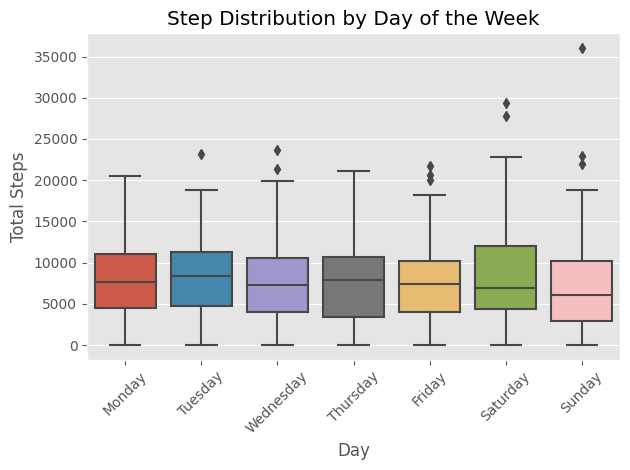

In [16]:
# to check column Total_steps are evenly distributed or have outliers 

sns.boxplot(data=data1, x='days_of_week', y='TotalSteps', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Step Distribution by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Steps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📊 Trend: Step Count by Day of the Week

To understand how users' activity changes throughout the week, we looked at a boxplot showing total steps each day.

- Some users had **very high step counts** (like over 30,000), which appear as outliers.
- The amount of movement (spread of steps) looks fairly **consistent across all days**.
- On **Saturdays**, people seem to take slightly more steps on average compared to other days.

➡️ Since a few extreme values could affect the average, we’ll use the **median** (middle value) instead of the mean to get a more accurate picture of user behavior.


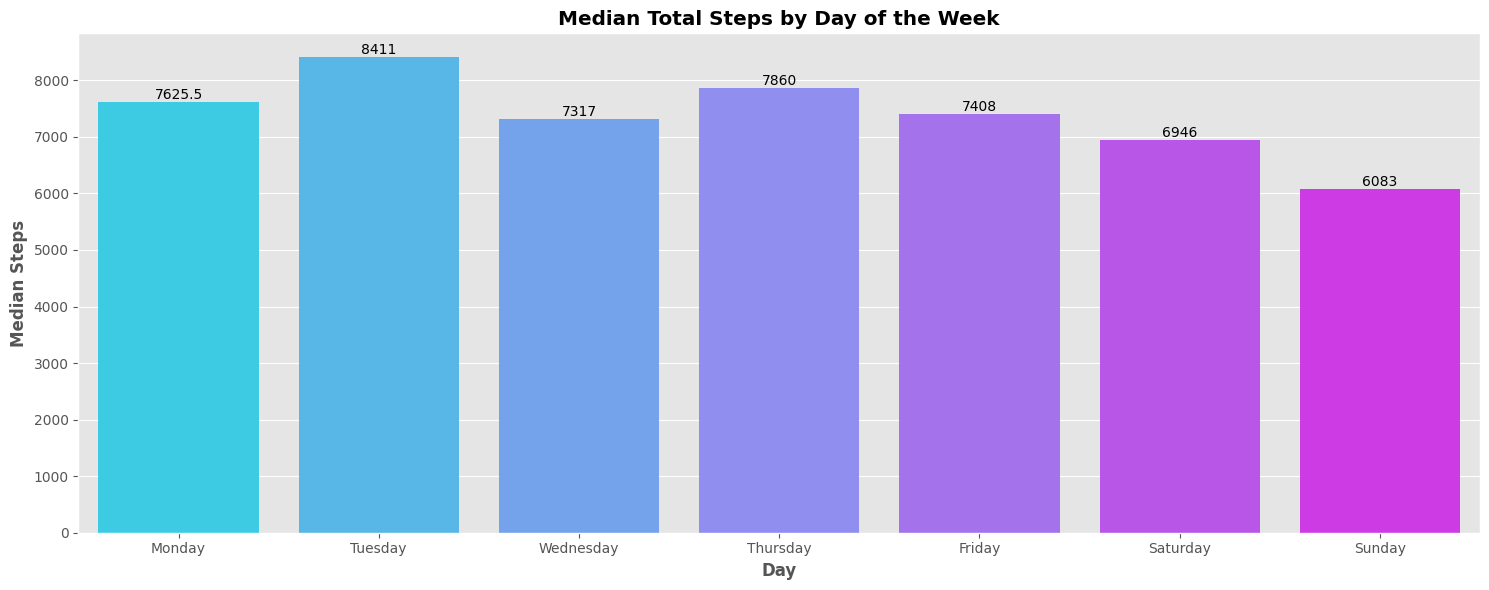

In [17]:
# Median Total-steps By Day of the Week

steps_by_day_median = data1.groupby('days_of_week')['TotalSteps'].median().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(15,6))
x=sns.barplot(x=steps_by_day_median.index, y=steps_by_day_median.values, palette="cool")
for container in x.containers:
    x.bar_label(container)
plt.title("Median Total Steps by Day of the Week",fontweight="bold")
plt.ylabel("Median Steps",fontweight="bold")
plt.xlabel("Day",fontweight="bold")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 📊 Insight: Median Steps by Day of the Week

####  Observations:
- 🥇 **Tuesday** had the highest median step count (8,411), showing that users were most active on this day.
- 📉 **Sunday** had the lowest median steps (6,083), suggesting lower physical activity during weekends.
- 💼 Weekdays in general (Monday to Friday) had higher step counts compared to weekends.

####  Interpretation:
This trend suggests that users tend to walk more on weekdays, likely due to work routines or daily commuting. On weekends, their activity levels drop, possibly because of more rest or leisure time.

####  Marketing Recommendation:
Bellabeat can use this insight to:
- Encourage weekend movement through **reminder notifications** or **mini step challenges**.
- Design personalized messages that motivate users to stay active even on less active days like **Sunday**.


# #Total_distance vs calories analysis

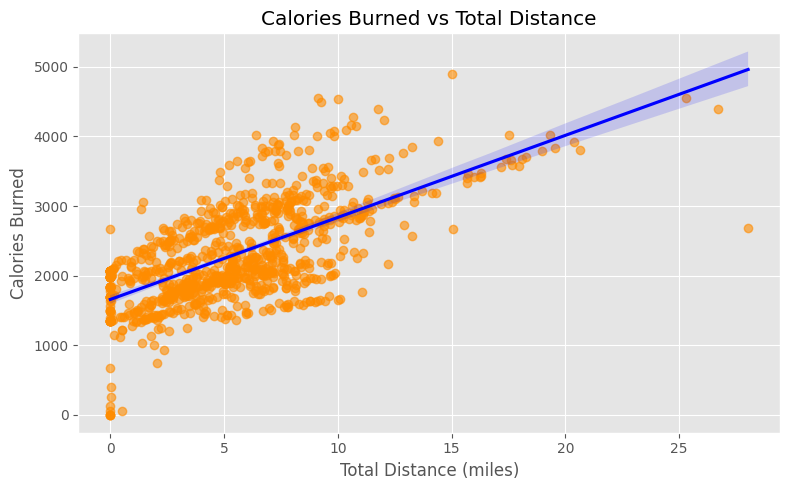

Correlation between TotalDistance and Calories: 0.64


In [18]:
# to find correlation between total_distance and calories
plt.figure(figsize=(8,5))
sns.regplot(x='TotalDistance', y='Calories', data=data1,scatter_kws={'color': 'darkorange', 'alpha': 0.6},line_kws={'color': 'blue'})
plt.title('Calories Burned vs Total Distance')
plt.xlabel('Total Distance (miles)')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = data1['TotalDistance'].corr(data1['Calories'])
print(f"Correlation between TotalDistance and Calories: {correlation:.2f}")


###  Calories Burned vs Total Distance

We found a strong positive correlation (**0.64**) between the total distance walked and calories burned.

This means that as users cover more distance throughout the day, they tend to burn more calories — which aligns with expected physical activity behavior.

➡️ Distance is a good indicator of overall activity level and energy expenditure. This insight can help Bellabeat personalize feedback and encourage users to stay active throughout the day.


# #Total_steps vs calories analysis

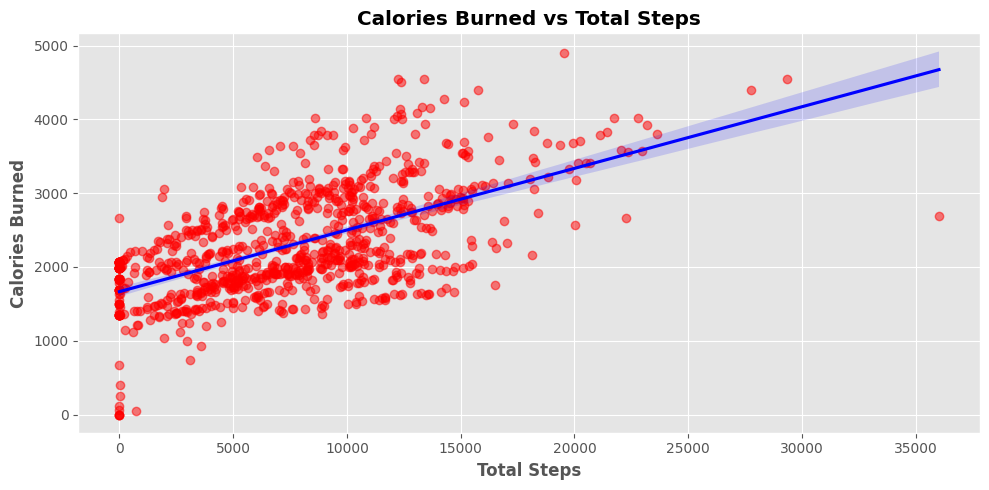

Correlation between steps and calories: 0.59


In [19]:
# to find out more steps is related to more calories burn or not 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.regplot(x='TotalSteps', y='Calories', data=data1,color='red', scatter_kws={'alpha':0.5}, line_kws={"color":"blue"})
plt.title('Calories Burned vs Total Steps',fontweight="bold")
plt.xlabel('Total Steps',fontweight="bold")
plt.ylabel('Calories Burned',fontweight="bold")
plt.tight_layout()
plt.show()

correlation = data1['TotalSteps'].corr(data1['Calories'])
print(f"Correlation between steps and calories: {correlation:.2f}")

### 🔥 Insight: Calories Burned vs Total Steps

This scatter plot with a trendline shows how total steps relate to calories burned.

- There's a **clear upward trend**, meaning users who walk more tend to burn more calories.
- The blue line (regression line) shows the general direction of this relationship.
- The spread of red dots around the line indicates some variation — likely due to factors like intensity or body weight.

✅ **Conclusion:**  
There is a **moderate positive correlation** between steps and calories burned.  
Bellabeat can use this to motivate users: **“More steps = more energy burned.”**

📢 *Marketing tip:* Encourage users with step goals, streak rewards, and energy feedback to keep them moving!


# #VeryActiveMinutes vs Calories analysis

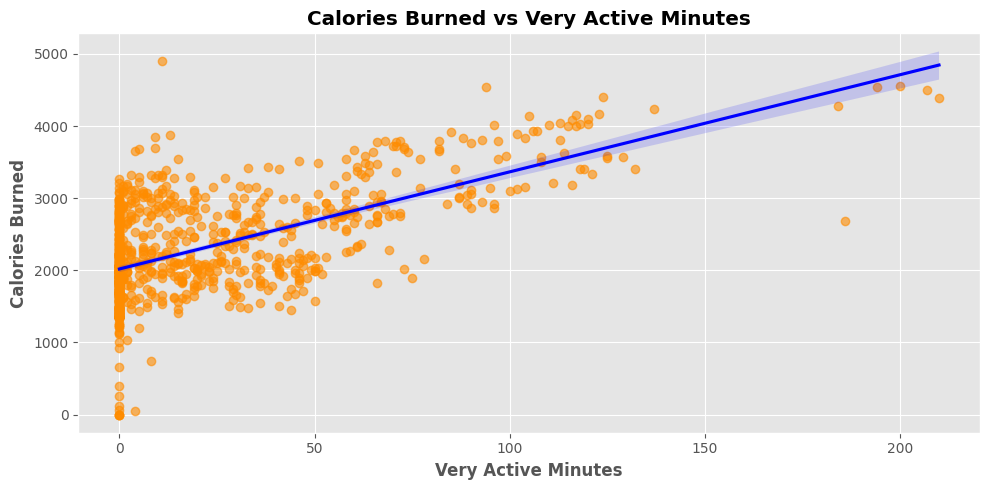

Correlation between VeryActiveMinutes and Calories: 0.62


In [20]:
#To find out whether more time spent being very active leads to more calories burned.
plt.figure(figsize=(10, 5))
sns.regplot(
    data=data1,x='VeryActiveMinutes',y='Calories',scatter_kws={'color': 'darkorange', 'alpha': 0.6},line_kws={'color': 'blue'})
plt.title("Calories Burned vs Very Active Minutes",fontweight="bold")
plt.xlabel("Very Active Minutes",fontweight="bold")
plt.ylabel("Calories Burned",fontweight="bold")
plt.grid(True)
plt.tight_layout()
plt.show()

correlation=data1["VeryActiveMinutes"].corr(data1["Calories"])
print(f"Correlation between VeryActiveMinutes and Calories: {round(correlation, 2)}")

### Insight: Calories Burned vs Very Active Minutes

We explored how **Very Active Minutes** relate to **Calories Burned**, and found a clear connection:

- The chart shows a **positive trend** — as active minutes go up, calorie burn increases.
- The **correlation coefficient is 0.62**, indicating a **moderately strong relationship**.
- This means users who spend more time in intense physical activity tend to burn more calories.

 **Implication for Bellabeat:**  
Encouraging users to increase their very active minutes (via challenges, reminders, or rewards) could help them achieve better calorie-burning results, improving both health outcomes and engagement.


# Active minutes and Sedentary minute analysis

In [21]:
 data1["ActiveMinutes"] = data1["VeryActiveMinutes"] + data1["LightlyActiveMinutes"]

In [22]:
data1[['VeryActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'ActiveMinutes', 'Calories']].corr()


,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,ActiveMinutes,Calories
VeryActiveMinutes,1.000000,0.051926,-0.164671,0.333078,0.615838
LightlyActiveMinutes,0.051926,1.000000,-0.437104,0.958923,0.286718
SedentaryMinutes,-0.164671,-0.437104,1.000000,-0.459477,-0.106973
ActiveMinutes,0.333078,0.958923,-0.459477,1.000000,0.445640
Calories,0.615838,0.286718,-0.106973,0.445640,1.000000


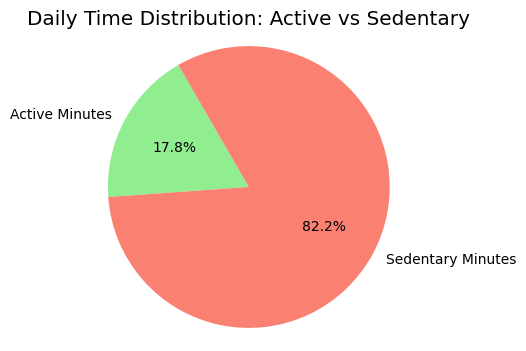

In [23]:
# Get overall median values
median_active = data1['ActiveMinutes'].median()
median_sedentary = data1['SedentaryMinutes'].median()

labels = ['Active Minutes', 'Sedentary Minutes']
sizes = [median_active, median_sedentary]
colors = ['lightgreen', 'salmon']

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=120,)
plt.title("Daily Time Distribution: Active vs Sedentary")
plt.axis('equal') 
plt.show()

### 🕒 Daily Time Distribution: Active vs Sedentary (Median)

- **Median Active Minutes:** 17.8%  
- **Median Sedentary Minutes:** 82.2%  

📊 **Insights:**  
- On an average day, users spend most of their time being sedentary.  
- The median value shows that even on typical days, active time remains quite low.  
- A balanced daily routine with more movement could improve health and energy levels.  

💡 **Tip:**  
Encourage users to include light workouts or walking breaks to reduce sedentary behavior throughout the day.


# Calories VS Active_minute and  Sedentary_minutes

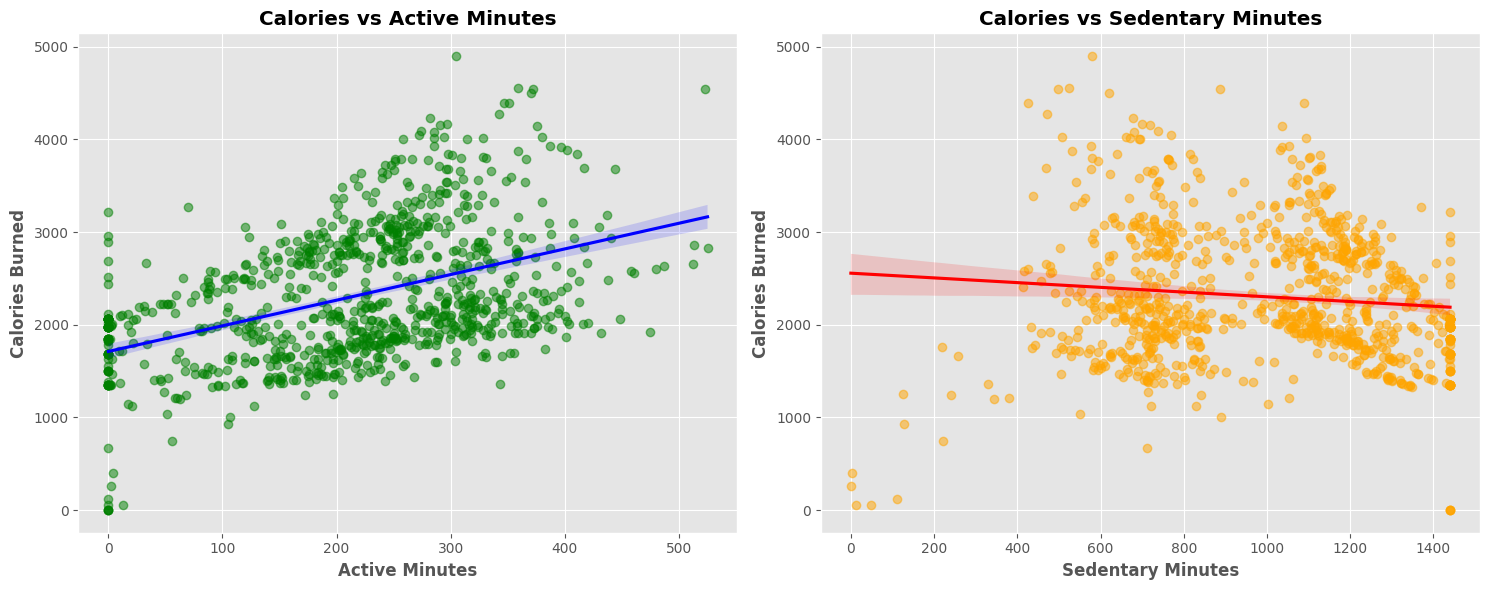

In [24]:
plt.figure(figsize=(15,6))
# Active Minutes vs Calories
plt.subplot(1,2,1)
sns.regplot(x=data1["ActiveMinutes"], y=data1["Calories"], scatter_kws={'alpha':0.5, 'color':'green'}, line_kws={'color':'blue'})
plt.title("Calories vs Active Minutes",fontweight="bold")
plt.xlabel("Active Minutes",fontweight="bold")
plt.ylabel("Calories Burned",fontweight="bold")

# Sedentary Minutes vs Calories
plt.subplot(1,2,2)
sns.regplot(x=data1["SedentaryMinutes"], y=data1["Calories"], scatter_kws={'alpha':0.5, 'color':'orange'}, line_kws={'color':'red'})
plt.title("Calories vs Sedentary Minutes",fontweight="bold")
plt.xlabel("Sedentary Minutes",fontweight="bold")
plt.ylabel("Calories Burned",fontweight="bold")


plt.tight_layout()
plt.show()


###  Calories vs Active & Sedentary Minutes

- **More active minutes = more calories burned.**  
  As expected, when users move more (walk, run, etc.), they tend to burn more calories.

- **More sedentary time = slightly fewer calories burned.**  
  People who stay inactive for long hours burn fewer calories, even if the drop is not too sharp.

 **Tip:** Encouraging users to stay active during the day, even with light activity, can help improve calorie burn.


#  #Steps, Active Minutes, and Calories on Weekdays vs Weekends

In [25]:
steps = data1.groupby('weekend_or_weekday')['TotalSteps'].median()
active = data1.groupby('weekend_or_weekday')['ActiveMinutes'].median()
cal = data1.groupby('weekend_or_weekday')['Calories'].median()

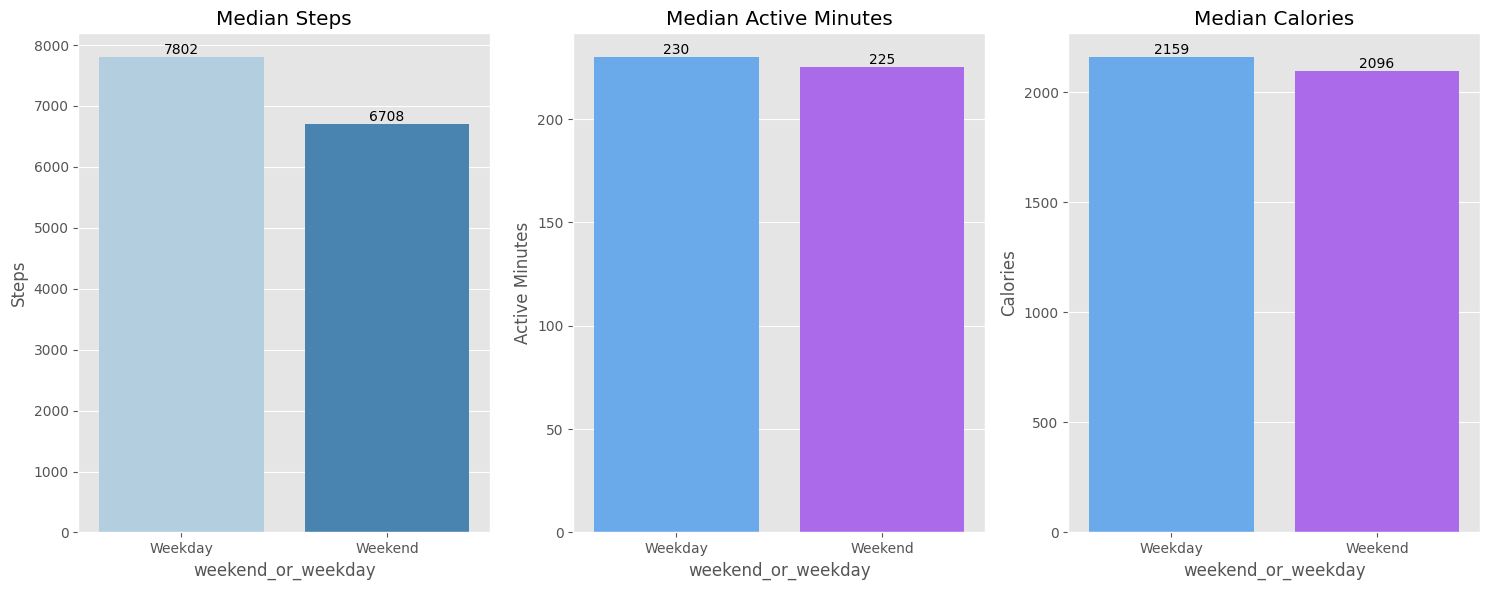

In [26]:
plt.figure(figsize=(15,6))
# Plot 1: Median Steps
plt.subplot(1, 3, 1)
x=sns.barplot(x=steps.index, y=steps.values, palette="Blues")
for container in x.containers:
    x.bar_label(container)
plt.title("Median Steps")
plt.ylabel("Steps")
# Plot 2: Median Active Minutes
plt.subplot(1, 3, 2)
y=sns.barplot(x=active.index, y=active.values, palette="cool")
for container in y.containers:
    y.bar_label(container)
plt.title("Median Active Minutes")
plt.ylabel("Active Minutes")
# Plot 3: Median Calories
plt.subplot(1, 3, 3)
z=sns.barplot(x=cal.index, y=cal.values, palette="cool")
for container in z.containers:
    z.bar_label(container)
plt.title("Median Calories")
plt.ylabel("Calories")
plt.tight_layout()
plt.show()


###  Weekend vs Weekday Activity Comparison

- People take **more steps** on weekdays (median: 7802) than weekends (median: 6708).
- **Active minutes** are almost the same, with a slight edge on weekdays.
- **Calories burned** are also a bit higher on weekdays.

It looks like users are generally more active and burn more calories during the weekdays. Maybe daily routines like work or commute are keeping them moving!

### Marketing Insight for Bellabeat

Since users tend to be more active on weekdays, Bellabeat could:

- Introduce a **"Weekend Boost" feature** in their app or devices — gentle reminders or motivational challenges (like step goals or 5-min activity boosts) specifically for weekends.
- Use smart notifications to **encourage short bursts of activity** during typically sedentary weekend hours (e.g., Saturday afternoon).
- Offer **weekend-based wellness content** (like guided walks, yoga, or mindfulness sessions) through the Bellabeat Membership plan.

This would help users stay consistent with their wellness goals and position Bellabeat as a more personalized and habit-aware wellness partner.


# #Month-wise Trends in User Activity and Calories (April and May)

In [27]:
steps = data1.groupby('month_name')['TotalSteps'].median()
active = data1.groupby('month_name')['ActiveMinutes'].median()
calories = data1.groupby('month_name')['Calories'].median()

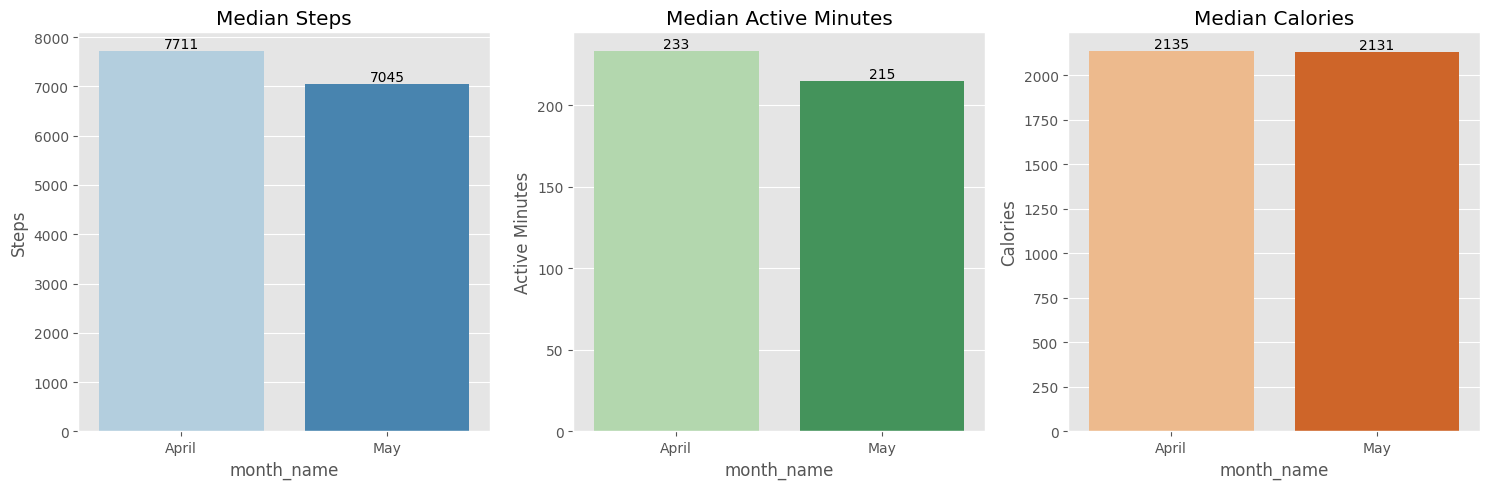

In [28]:
plt.figure(figsize=(15, 5))

# Plot 1: Steps
plt.subplot(1, 3, 1)
x = sns.barplot(x=steps.index, y=steps.values, palette="Blues")
x.bar_label(x.containers[0])
plt.title("Median Steps")
plt.ylabel("Steps")
# Plot 2: Active Minutes
plt.subplot(1, 3, 2)
y = sns.barplot(x=active.index, y=active.values, palette="Greens")
y.bar_label(y.containers[0])
plt.title("Median Active Minutes")
plt.ylabel("Active Minutes")
# Plot 3: Calories
plt.subplot(1, 3, 3)
z = sns.barplot(x=calories.index, y=calories.values, palette="Oranges")
z.bar_label(z.containers[0])
plt.title("Median Calories")
plt.ylabel("Calories")
plt.tight_layout()
plt.show()

### Monthly Activity Insights

- **Steps**: Median steps decreased from **7711 in April** to **7045 in May**, showing reduced physical activity.
- **Active Minutes**: Median active minutes dropped from **233 in April** to **215 in May**, indicating less active engagement.
- **Calories Burned**: Median calories burned remained almost unchanged, with a slight dip from **2135 in April** to **2131 in May**.
